<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Supervised_Learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning with scikit-learn

from DataCamp course

modified notes from the course and solved exercises by me

##Classification

**The classification challenge**

> We have a set of labeled data and we want to build a classifier that takes unlabeled data as input and outputs a label.

First: choose the right type of the classifier. 

Second: take data which is already labeled. 

**k-Nearest Neighbors** *predicts the label of any data point by looking at the K, closest labeled data points and getting them to vote on what label the unlabeled point should have*

*k-Nearest Neighbors* - classification examples

 how do you classify a blue data point in the middle:

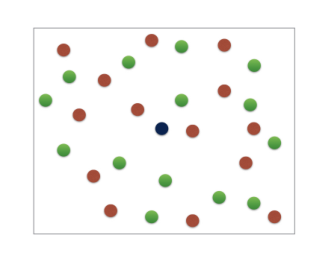

 * if k equals 3:

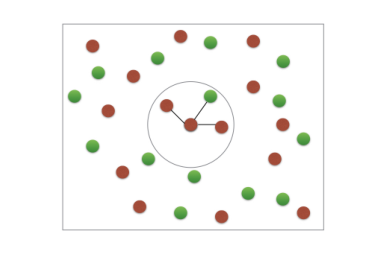
> as red
 * if k equals 5:

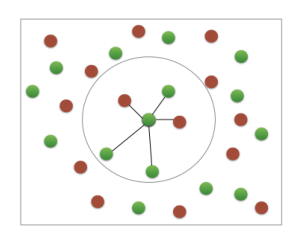

>as green.



**kNN on Iris dataset scatterplot**

Here we have 2d plot of the Iris dataset. It is visualized as 2d for the learning purposes, naturally it holds more than 2 dimensions. 
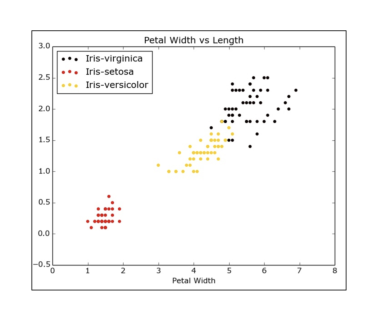
kNN creates a decision boundaries, visualized on the plot. 

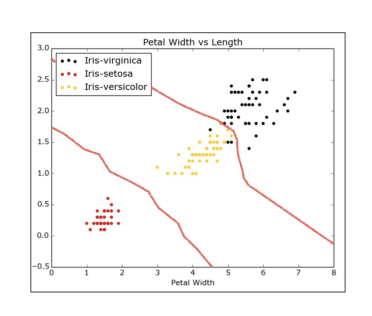
Any new data point within those boundries will be precidted according to it as  'setosa', 'virginica' or  'versicolor'.

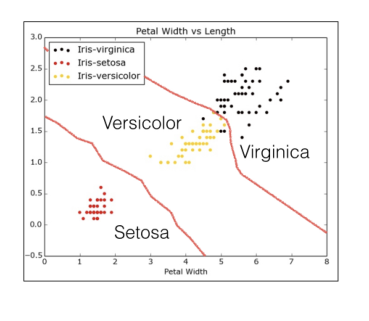

**Scikit-learn fit and predict**

*All machine learning models in scikit-learn are implemented as python classes.*
classes serve two purposes:
* they implement the algorithms for learning a model and predicting,
* storing all the information that is learned from the data. 

Training (fitting) a model to the data is performed with the method ```.fit()```. And the ```.predict()``` method is used to predict the label of an, unlabeled data point.

**Fit a model: step by step**

> The scikit-learn API *requires* firstly that you have **the data as a NumPy array or pandas DataFrame**. 

> It also *requires* that the features take on **continuous values**, such as the price of a house, as opposed to categories, such as 'male' or 'female'.

> It also *requires* that there are **no missing values** in the data.

>  *Requires* that the features are in an array where **each column is a feature** and **each row a different observation** or data point. 


* import KNeighborsClassifier from sklearn.neighbors.

```
from sklearn.neighbors import KNeighborsClassifier
```

* then instantiate our KNeighborsClassifier, set the number of neighbors equal to 6, and assign it to the variable knn

```
knn = KNeighborsClassifier(n_neighbors=6)
```
* fit this classifier to our training set, the labeled data - we apply the method fit to the classifier and pass it two arguments: the features as a NumPy array and the labels, or target, as a NumPy array.

```
knn.fit(iris['data'], iris['target'])
```
Returns the classifier itself and modifies it to fit it to the data. 
```
KNeighborsClassifier(algorithm='auto', leaf_size=30,
metric='minkowski',metric_params=None, n_jobs=1,
n_neighbors=6, p=2,weights='uniform')
```

Looking at the shape of iris data, we see that there are 150 observations of four features.

```
iris['data'].shape
```
```
(150, 4)
```

The target needs to be a single column with the same number of observations as the feature data.

```
iris['target'].shape
```

```
(150,)
```

In this case there are indeed also 150 labels. 

---
 We have fit our classifier, lets use it to predict on some unlabeled data!

**Predicting on unlabeled data**

 We have set of observations, X new.

```
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
[5.7, 2.6, 3.8, 1.3],
[4.7, 3.2, 1.3, 0.2]])
```

We use the predict method on the classifier and pass it the data. 

```
prediction = knn.predict(X_new)
```

The API requires that we pass the data as a NumPy array with features in columns and observations in rows; checking the shape of X new, we see that it has three rows and four columns, that is, three observations and four features. 
```
X_new.shape
```
```
(3, 4)
```
Then we would expect calling knn.predict of X new to return a three-by-one array with a prediction for each observation or row in X new. And indeed it does! It predicts one, which corresponds to 'versicolor' for the first two observations and 0, which corresponds to 'setosa' for the third.

```
print('Prediction: {}’.format(prediction))
```
```
Prediction: [1 1 0]
```


**k-NN in practice - fitting**

Fit a k-Nearest Neighbors classifier to the voting dataset. 
> The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. 

> The target needs to be a single column with the same number of observations as the feature data.

Create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.


* Import KNeighborsClassifier from sklearn.neighbors.
* Create arrays X and y for the features and the target variable. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
* Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
* Fit the classifier to the data using the .fit() method.

```
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)
```

**kNN predicting in practice**

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

* Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
* Instantiate a KNeighborsClassifier with 6 neighbors.
* Fit the classifier to the data.
* Predict the labels of the training data, X.
* Predict the label of the new data point X_new.

```

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
```

```
Prediction: ['democrat']
```
 Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn next.

**Measuring model performance**

Now that we know how to fit a classifier and use it to predict the labels of previously unseen data, we need to figure out how to measure its performance. That is, we need a metric.

In classification we use a metric of **accuracy** - *the number of correct predictions divided by the total number of data points.*

> Which data do we use to compute accuracy?